# IT 496 - Introduction to Data Mining

# Course Project 2 

# Group - 7

In [1]:
import pandas as pd
import numpy as np
import os
import ipaddress
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV

In [2]:
df = pd.read_csv('Dataset-Unicauca-Version2-87Atts.csv')
df.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


### T1.
Explore the dataset assigned to your team and provide: a. A summary of the dataset (should include information columns present, attribute types, null values, and a summary of each attribute). b. Data Visualization, summarizing insights about the dataset through EDA.

## Summary of Dataset 
This dataset was collected in a network section from Universidad Del Cauca, Popayán, Colombia by executing packet captures at different times such as different hours (during morning and afternoon) for a period of six days :
26th April, 27th April, 28th April, 9th May, 11th May, 15th May
And a total of 3,577,296 were collected and stored. Currently the dataset contains 87 features, here each instance holds the information generated by an IP flow generated by a network device(source and destination IP addresses, ports, interarrival times, layer 7 protocol (application) used on that flow as the class, among others. Most of the attributes are numeric type but there are also nominal types and a date type due to the Timestamp.)

In [3]:
df.shape

(3577296, 87)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577296 entries, 0 to 3577295
Data columns (total 87 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow.ID                      object 
 1   Source.IP                    object 
 2   Source.Port                  int64  
 3   Destination.IP               object 
 4   Destination.Port             int64  
 5   Protocol                     int64  
 6   Timestamp                    object 
 7   Flow.Duration                int64  
 8   Total.Fwd.Packets            int64  
 9   Total.Backward.Packets       int64  
 10  Total.Length.of.Fwd.Packets  int64  
 11  Total.Length.of.Bwd.Packets  float64
 12  Fwd.Packet.Length.Max        int64  
 13  Fwd.Packet.Length.Min        int64  
 14  Fwd.Packet.Length.Mean       float64
 15  Fwd.Packet.Length.Std        float64
 16  Bwd.Packet.Length.Max        int64  
 17  Bwd.Packet.Length.Min        int64  
 18  Bwd.Packet.Length.Mean       float64
 19  

In [7]:
df.describe()

,Source.Port,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,...,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol
count,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,...,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06
mean,3.799938e+04,1.204246e+04,6.005508e+00,2.544247e+07,6.237799e+01,6.534083e+01,4.683323e+04,8.445742e+04,5.123645e+02,9.340408e+00,...,2.569738e+01,2.981990e+05,1.836406e+05,5.229372e+05,1.676336e+05,8.524211e+06,1.370991e+06,9.743845e+06,7.252097e+06,1.029508e+02
std,2.201713e+04,2.044916e+04,3.274574e-01,4.014430e+07,1.094086e+03,1.108092e+03,1.816196e+06,2.124319e+06,1.039319e+03,8.299983e+01,...,6.025989e+00,2.349390e+06,1.325838e+06,3.266508e+06,2.064219e+06,1.706568e+07,4.814474e+06,1.888557e+07,1.600754e+07,5.129198e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,3.697000e+03,4.430000e+02,6.000000e+00,6.280000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.100000e+01
50%,4.937700e+04,3.128000e+03,6.000000e+00,5.847295e+05,6.000000e+00,5.000000e+00,4.430000e+02,2.080000e+02,2.060000e+02,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.260000e+02
75%,5.379900e+04,3.128000e+03,6.000000e+00,4.500153e+07,1.500000e+01,1.500000e+01,1.769000e+03,3.629000e+03,6.130000e+02,6.000000e+00,...,3.200000e+01,4.500000e+01,0.000000e+00,5.700000e+01,2.000000e+00,7.506747e+06,0.000000e+00,8.034389e+06,5.369712e+06,1.300000e+02
max,6.553400e+04,6.553400e+04,1.700000e+01,1.200000e+08,4.531900e+05,5.421960e+05,6.780236e+08,1.345796e+09,3.283200e+04,1.606000e+04,...,5.230000e+02,1.146950e+08,7.297136e+07,1.146950e+08,1.146950e+08,1.200000e+08,7.738746e+07,1.200000e+08,1.200000e+08,2.220000e+02


In [8]:
print(df['Flow.ID'].unique())
print(df['Source.IP'].unique())
print(df['Destination.IP'].unique())
print(df['Timestamp'].unique())
print(df['ProtocolName'].unique())

['172.19.1.46-10.200.7.7-52422-3128-6'
 '10.200.7.217-50.31.185.39-38848-80-6'
 '192.168.72.43-10.200.7.7-55961-3128-6' ...
 '192.168.41.8-10.200.7.8-50493-3128-6'
 '192.168.130.51-10.200.7.9-64889-3128-6'
 '192.168.10.112-10.200.7.9-1235-3128-6']
['172.19.1.46' '10.200.7.7' '50.31.185.39' ... '96.7.0.79' '98.138.47.34'
 '98.139.180.180']
['10.200.7.7' '172.19.1.46' '10.200.7.217' ... '172.18.1.207'
 '192.168.81.94' '192.168.32.19']
['26/04/201711:11:17' '26/04/201711:11:18' '26/04/201711:11:19' ...
 '15/05/201705:43:18' '15/05/201705:37:07' '15/05/201705:39:05']
['HTTP_PROXY' 'HTTP' 'HTTP_CONNECT' 'SSL' 'GOOGLE' 'YOUTUBE' 'FACEBOOK'
 'CONTENT_FLASH' 'DROPBOX' 'WINDOWS_UPDATE' 'AMAZON' 'MICROSOFT' 'TOR'
 'GMAIL' 'YAHOO' 'MSN' 'SSL_NO_CERT' 'SKYPE' 'MS_ONE_DRIVE' 'MSSQL'
 'TWITTER' 'APPLE_ICLOUD' 'CLOUDFLARE' 'UBUNTUONE' 'OFFICE_365'
 'WIKIPEDIA' 'OPENSIGNAL' 'DNS' 'HTTP_DOWNLOAD' 'WHATSAPP' 'APPLE_ITUNES'
 'FTP_DATA' 'CITRIX' 'APPLE' 'MQTT' 'INSTAGRAM' 'EBAY' 'GOOGLE_MAPS'
 'IP_ICMP' '

In [9]:
null_counts = df.isnull().sum()

print("Number of null values in each column:")
print(null_counts)

Number of null values in each column:
Flow.ID             0
Source.IP           0
Source.Port         0
Destination.IP      0
Destination.Port    0
                   ..
Idle.Max            0
Idle.Min            0
Label               0
L7Protocol          0
ProtocolName        0
Length: 87, dtype: int64


In [10]:
df.columns

Index(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
  

THE  APPLICATION NAME ARE :

['GOOGLE', 'HTTP', 'HTTP_PROXY', 'SSL', 'HTTP_CONNECT', 'YOUTUBE', 'AMAZON', 'MICROSOFT', 'GMAIL', 'WINDOWS_UPDATE', 'SKYPE', 'FACEBOOK', 'DROPBOX', 'YAHOO', 'TWITTER', 'CLOUDFLARE', 'MSN', 'CONTENT_FLASH', 'APPLE', 'OFFICE_365', 'WHATSAPP', 'INSTAGRAM', 'WIKIPEDIA', 'MS_ONE_DRIVE', 'DNS', 'IP_ICMP', 'NETFLIX', 'APPLE_ITUNES', 'SPOTIFY', 'APPLE_ICLOUD', 'EBAY', 'SSL_NO_CERT', 'GOOGLE_MAPS', 'EASYTAXI', 'TEAMVIEWER', 'HTTP_DOWNLOAD', 'MQTT', 'TOR', 'FTP_DATA', 'UBUNTUONE', 'NTP', 'SSH', 'EDONKEY', 'WAZE', 'DEEZER', 'UNENCRYPED_JABBER', 'CITRIX_ONLINE', 'TIMMEU', 'UPNP', 'TELEGRAM', 'FTP_CONTROL', 'TWITCH', 'MSSQL', 'H323', 'CNN', 'LASTFM', 'CITRIX', 'ORACLE', 'TEAMSPEAK', 'BGP', 'RTMP', 'BITTORRENT', 'WHOIS_DAS', 'SKINNY', 'OPENSIGNAL', 'MAIL_IMAPS', 'OSCAR', 'LOTUS_NOTES', 'SIMET', 'IP_OSPF', 'RADIUS', 'OPENVPN', 'SNMP', 'STARCRAFT', 'QQ', '99TAXI', 'SOCKS', 'NFS']


THE FREQUENCY OF APPLICATION:

[959110, 683734, 623210, 404883, 317526, 170781, 86875, 5471

Text(0, 0.5, 'Frequency')

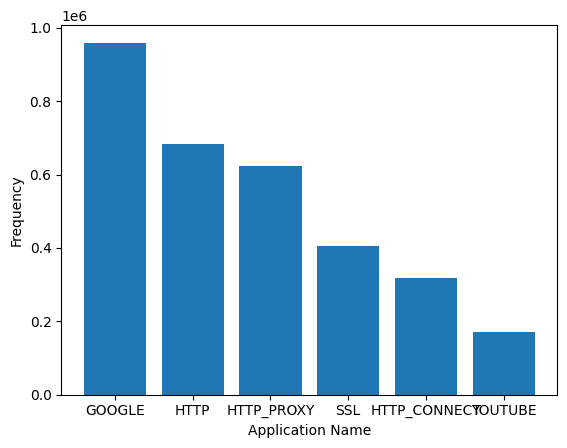

In [11]:
freq_protocol = df['ProtocolName'].value_counts()
app_name = []
freq_cnt = []
for key, value in freq_protocol.items():
    app_name.append(key)
    freq_cnt.append(value)
    
print("THE  APPLICATION NAME ARE :\n")  
print(app_name)
print("\n")
print("THE FREQUENCY OF APPLICATION:\n")
print(freq_cnt)
print("\n")
print("Number of Unique Application Names: ", len(freq_protocol))   
print("\n")
print("PLOT OF TOP 6 MOSTLY USED APPLICATION ")
plt.bar(app_name[:6], freq_cnt[:6])
plt.xlabel("Application Name")
plt.ylabel("Frequency")

In [12]:
Protocol_name= df["ProtocolName"].value_counts()
Protocol_name

ProtocolName
GOOGLE          959110
HTTP            683734
HTTP_PROXY      623210
SSL             404883
HTTP_CONNECT    317526
                 ...  
STARCRAFT            3
QQ                   2
99TAXI               1
SOCKS                1
NFS                  1
Name: count, Length: 78, dtype: int64

<Axes: ylabel='count'>

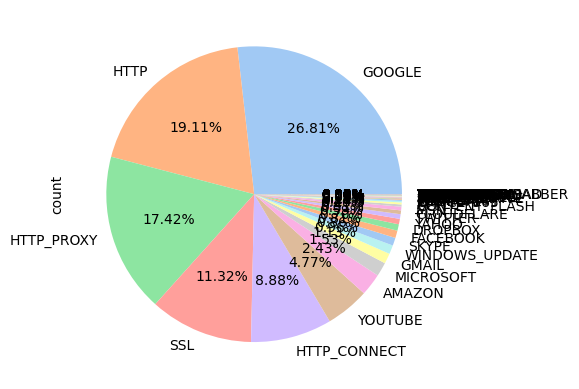

In [13]:
piec_colors = sns.color_palette('pastel')[0:len(Protocol_name)]
Protocol_name.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

<Axes: xlabel='Total.Backward.Packets', ylabel='Total.Fwd.Packets'>

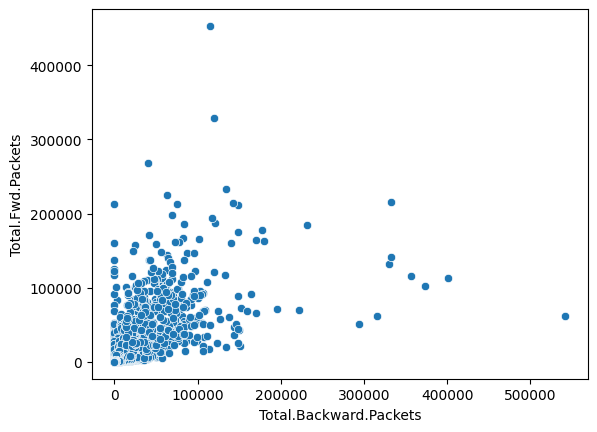

In [14]:
sns.scatterplot(x=df["Total.Backward.Packets"], y=df["Total.Fwd.Packets"])

In [27]:
for column in df.columns:
    if df[column].dtype == 'object':
        try:
            df[column] = pd.to_numeric(df[column])
        except ValueError:
            # Handle any conversion errors, if necessary
            print(f"Could not convert column '{column}' to numeric.")

Could not convert column 'Flow.ID' to numeric.
Could not convert column 'Source.IP' to numeric.
Could not convert column 'Destination.IP' to numeric.
Could not convert column 'Timestamp' to numeric.
Could not convert column 'Label' to numeric.
Could not convert column 'ProtocolName' to numeric.


In [3]:
def ip_to_int(ip):
    return int(ipaddress.IPv4Address(ip))

df['Source.IP'] = df['Source.IP'].apply(ip_to_int)
df['Destination.IP'] = df['Destination.IP'].apply(ip_to_int)

In [4]:
from datetime import datetime


df['Timestamp'] = df['Timestamp'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y%H:%M:%S'))

# Extract date and time components
df['Year'] = df['Timestamp'].apply(lambda x: x.year)
df['Month'] = df['Timestamp'].apply(lambda x: x.month)
df['Day'] = df['Timestamp'].apply(lambda x: x.day)
df['Hour'] = df['Timestamp'].apply(lambda x: x.hour)
df['Minute'] = df['Timestamp'].apply(lambda x: x.minute)
df['Second'] = df['Timestamp'].apply(lambda x: x.second)

# Display the updated DataFrame
print(df)

                                       Flow.ID   Source.IP  Source.Port  \
0          172.19.1.46-10.200.7.7-52422-3128-6  2886926638        52422   
1          172.19.1.46-10.200.7.7-52422-3128-6   180881159         3128   
2         10.200.7.217-50.31.185.39-38848-80-6   840939815           80   
3         10.200.7.217-50.31.185.39-38848-80-6   840939815           80   
4        192.168.72.43-10.200.7.7-55961-3128-6  3232253995        55961   
...                                        ...         ...          ...   
3577291  10.200.7.199-98.138.79.73-42135-443-6  1653231433          443   
3577292  10.200.7.217-98.138.79.73-51546-443-6  1653231433          443   
3577293  10.200.7.218-98.138.79.73-44366-443-6  1653231433          443   
3577294  10.200.7.195-98.138.79.73-52341-443-6  1653231433          443   
3577295  10.200.7.196-98.138.79.73-34188-443-6  1653231433          443   

         Destination.IP  Destination.Port  Protocol           Timestamp  \
0             180881159 

In [7]:
columns_to_remove = ['Flow.ID','Label','Year','Timestamp']
# Remove the specified columns
df = df.drop(columns=columns_to_remove)
df = df.reset_index(drop=True)

In [19]:
df.columns

Index(['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port',
       'Protocol', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max',
       'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean',
       'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min',
       'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max',
       'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std',
       'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Bwd.PSH.Flags',
       'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
       'Packet.Length.Std'

In [8]:
label_encoder = LabelEncoder()
df['ProtocolName'] = label_encoder.fit_transform(df['ProtocolName'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577296 entries, 0 to 3577295
Data columns (total 89 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Source.IP                    int64  
 1   Source.Port                  int64  
 2   Destination.IP               int64  
 3   Destination.Port             int64  
 4   Protocol                     int64  
 5   Flow.Duration                int64  
 6   Total.Fwd.Packets            int64  
 7   Total.Backward.Packets       int64  
 8   Total.Length.of.Fwd.Packets  int64  
 9   Total.Length.of.Bwd.Packets  float64
 10  Fwd.Packet.Length.Max        int64  
 11  Fwd.Packet.Length.Min        int64  
 12  Fwd.Packet.Length.Mean       float64
 13  Fwd.Packet.Length.Std        float64
 14  Bwd.Packet.Length.Max        int64  
 15  Bwd.Packet.Length.Min        int64  
 16  Bwd.Packet.Length.Mean       float64
 17  Bwd.Packet.Length.Std        float64
 18  Flow.Bytes.s                 float64
 19  

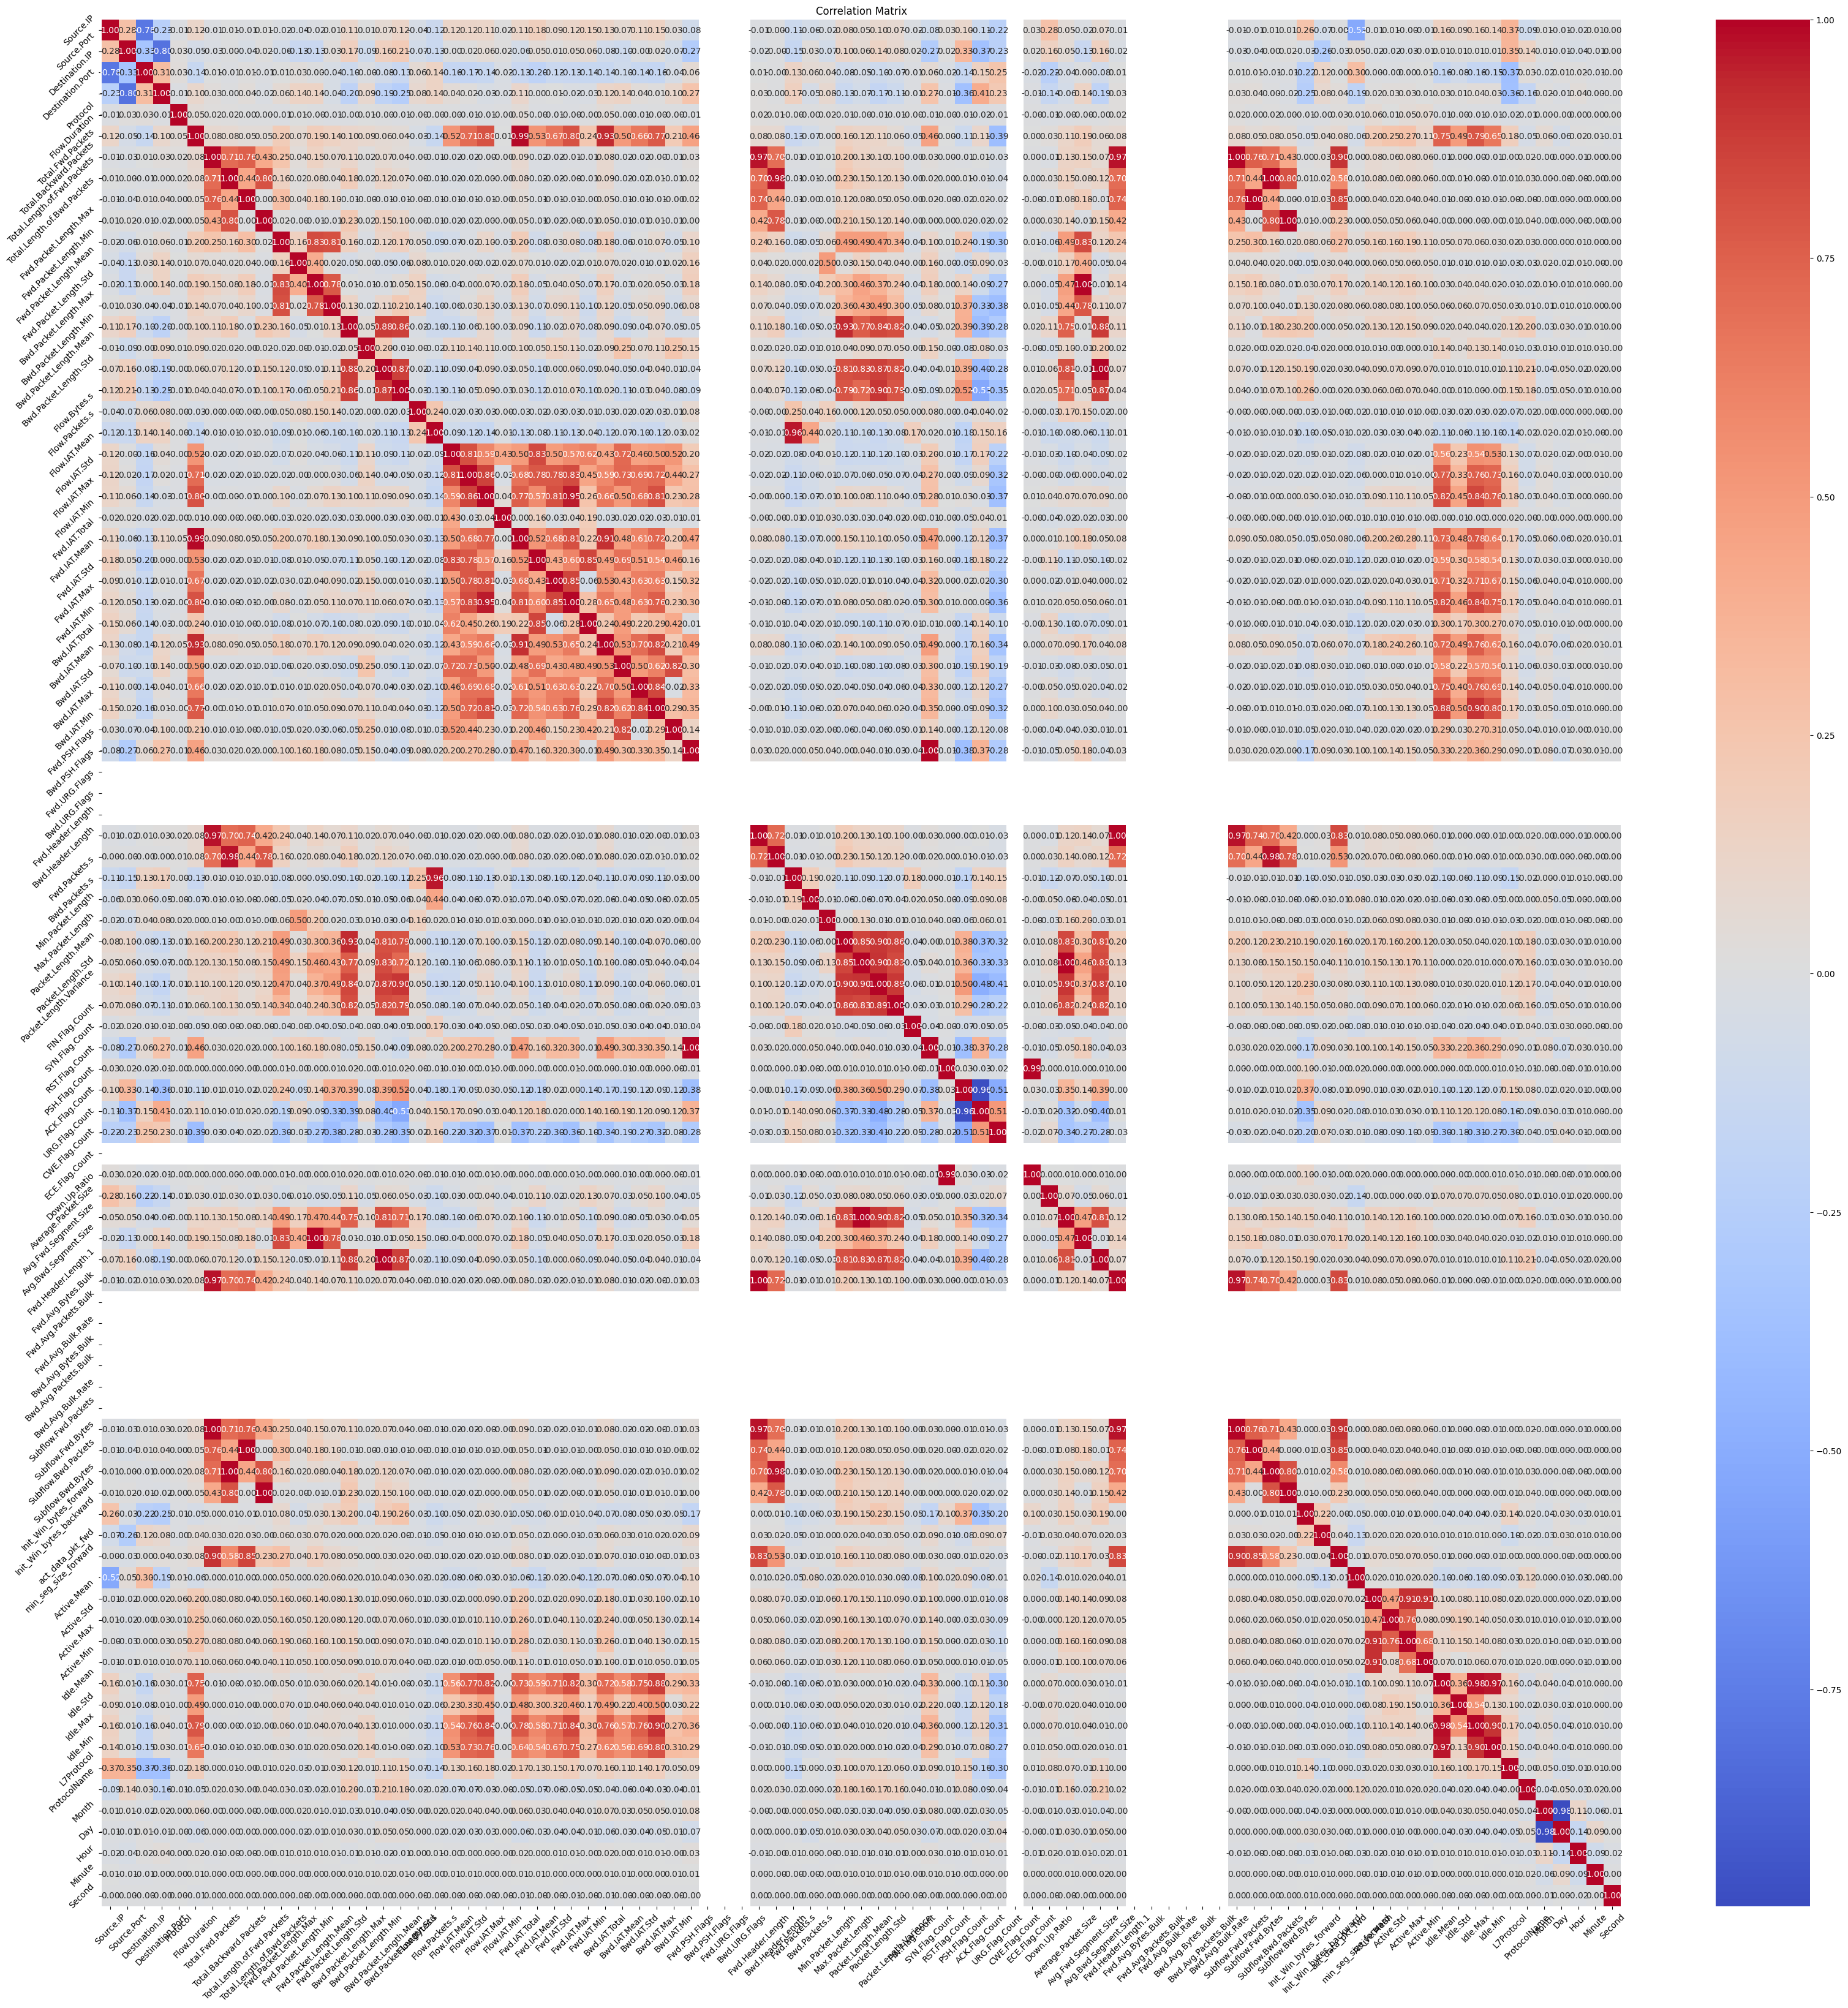

In [10]:
correlation_matrix = df.corr()
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

### T2.
Identify and list classification problems on your assigned dataset. Which one does seem
the most interesting to you and why?

Classification problems :
1) Protocol Name
2) Forwaded Packets

The most interesting one is protocol name as most of them are numeric type there is only this column which is categorical/classification so we chose this.

### T3. 
Build an end-to-end Machine Learning pipeline for your assigned dataset for the
aforementioned most interesting classification problems found in T2. Your pipeline
should include components for dataset preprocessing, transformation, classification
model building, hyperparameter tuning, grid search or optimization, and evaluation.
Report results on the classification models with hyperparameter tuning, and report the
best hyperparameter values. Report results using at least two relevant evaluation metrics
like Accuracy, Precision, Recall, F1 Score. Compare results for different models and give
the reasoning for that.

In [11]:
# Assuming df is your DataFrame with features and the 'protocol_name' target variable
# Selecting only the numeric columns (you may need to preprocess categorical data)
numeric_features = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()

# Sort the correlations with the 'protocol_name' target variable
# target_column = 'ProtocolName'
target_column = 'ProtocolName'
correlations_with_target = correlation_matrix[target_column].abs().sort_values(ascending=False)

# Select the top N most correlated columns (excluding the target variable)
N = 60
top_N_correlated_columns = correlations_with_target.index[1:N + 1]

# Now, top_N_correlated_columns contains the column names of the most correlated features
print(top_N_correlated_columns)

Index(['Bwd.Packet.Length.Mean', 'Avg.Bwd.Segment.Size',
       'Bwd.Packet.Length.Max', 'Max.Packet.Length', 'Bwd.Packet.Length.Std',
       'Packet.Length.Std', 'Packet.Length.Mean', 'Average.Packet.Size',
       'Destination.Port', 'Packet.Length.Variance', 'Source.Port',
       'min_seg_size_forward', 'ACK.Flag.Count', 'Source.IP', 'PSH.Flag.Count',
       'Fwd.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Mean', 'Bwd.IAT.Mean',
       'Fwd.IAT.Std', 'Fwd.IAT.Total', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Day',
       'Flow.Duration', 'Idle.Mean', 'URG.Flag.Count', 'Month', 'Idle.Max',
       'Idle.Min', 'Bwd.IAT.Std', 'Total.Length.of.Bwd.Packets',
       'Subflow.Bwd.Bytes', 'Bwd.IAT.Min', 'Bwd.IAT.Total', 'FIN.Flag.Count',
       'Flow.IAT.Max', 'Bwd.Header.Length', 'Fwd.Packet.Length.Max',
       'Destination.IP', 'Subflow.Bwd.Packets', 'Total.Backward.Packets',
       'Bwd.Packet.Length.Min', 'Hour', 'Fwd.Packet.Length.Min', 'Bwd.IAT.Max',
       'Active.Max', 'Active.Mean', 'Avg.Fwd.Segment.S

In [17]:
data_df = df[['Bwd.Packet.Length.Mean', 'Avg.Bwd.Segment.Size',
       'Bwd.Packet.Length.Max', 'Max.Packet.Length', 'Bwd.Packet.Length.Std',
       'Packet.Length.Std', 'Packet.Length.Mean', 'Average.Packet.Size',
       'Destination.Port', 'Packet.Length.Variance', 'Source.Port',
       'min_seg_size_forward', 'ACK.Flag.Count', 'Source.IP', 'PSH.Flag.Count',
       'Fwd.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Mean', 'Bwd.IAT.Mean',
       'Fwd.IAT.Std', 'Fwd.IAT.Total', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Day',
       'Flow.Duration', 'Idle.Mean', 'URG.Flag.Count', 'Month', 'Idle.Max',
       'Idle.Min', 'Bwd.IAT.Std', 'Total.Length.of.Bwd.Packets',
       'Subflow.Bwd.Bytes', 'Bwd.IAT.Min', 'Bwd.IAT.Total', 'FIN.Flag.Count',
       'Flow.IAT.Max', 'Bwd.Header.Length', 'Fwd.Packet.Length.Max',
       'Destination.IP', 'Subflow.Bwd.Packets', 'Total.Backward.Packets',
       'Bwd.Packet.Length.Min', 'Hour', 'Fwd.Packet.Length.Min', 'Bwd.IAT.Max',
       'Active.Max', 'Active.Mean', 'Avg.Fwd.Segment.Size',
       'Fwd.Packet.Length.Mean', 'Init_Win_bytes_backward', 'Fwd.Packets.s',
       'Fwd.Header.Length.1', 'Fwd.Header.Length', 'Idle.Std',
       'Flow.Packets.s', 'Active.Min', 'Init_Win_bytes_forward',
       'Flow.Bytes.s', 'Total.Fwd.Packets']]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_df,df["ProtocolName"], test_size=0.2, random_state=42)

In [19]:
y_train

741346           HTTP
431506     HTTP_PROXY
188492          YAHOO
487631        YOUTUBE
1929196        GOOGLE
              ...    
2356330    HTTP_PROXY
3511566          HTTP
2229084          HTTP
2768307          HTTP
2219110          HTTP
Name: ProtocolName, Length: 2861836, dtype: object

In [20]:
X_train

,Bwd.Packet.Length.Mean,Avg.Bwd.Segment.Size,Bwd.Packet.Length.Max,Max.Packet.Length,Bwd.Packet.Length.Std,Packet.Length.Std,Packet.Length.Mean,Average.Packet.Size,Destination.Port,Packet.Length.Variance,...,Init_Win_bytes_backward,Fwd.Packets.s,Fwd.Header.Length.1,Fwd.Header.Length,Idle.Std,Flow.Packets.s,Active.Min,Init_Win_bytes_forward,Flow.Bytes.s,Total.Fwd.Packets
741346,1455.105263,1455.105263,3737,3737,961.452310,982.170455,824.560976,845.175000,80,9.646588e+05,...,2353,3.295999e-01,680,680,0.000000e+00,6.278093e-01,0.0,5840,5.306088e+02,21
431506,6.000000,6.000000,6,6,0.000000,0.000000,6.000000,9.000000,3128,0.000000e+00,...,17496,4.444444e+03,20,20,0.000000e+00,8.888889e+03,0.0,64769,5.333333e+04,1
188492,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,443,0.000000e+00,...,61,1.132054e+01,32,32,0.000000e+00,2.264108e+01,0.0,894,0.000000e+00,1
487631,3231.599313,3231.599313,20104,20104,2595.014592,2508.946263,1795.562599,1796.131896,443,6.294811e+06,...,1672,1.209517e+01,45372,45372,2.748414e+06,2.711312e+01,41005.0,1672,4.868639e+04,1407
1929196,107.777778,107.777778,678,1657,214.345393,361.159637,163.904762,167.902439,443,1.304363e+05,...,22,1.522886e+02,752,752,0.000000e+00,2.714710e+02,0.0,14600,4.558065e+04,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2356330,155.368400,155.368400,322,322,162.417900,137.306700,119.451600,123.433300,3128,1.885312e+04,...,14600,1.081535e-01,220,220,2.388428e+07,2.949642e-01,323849.0,16876,3.539571e+01,11
3511566,0.000000,0.000000,0,31,0.000000,12.500000,24.750000,33.000000,50254,1.562500e+02,...,-1,1.500000e+06,60,60,0.000000e+00,1.500000e+06,0.0,262,3.400000e+07,3
2229084,6.000000,6.000000,6,6,0.000000,0.000000,6.000000,7.500000,50411,0.000000e+00,...,16415,1.594896e+03,20,20,0.000000e+00,6.379585e+03,0.0,524,3.827751e+04,1
2768307,6.000000,6.000000,6,6,0.000000,0.000000,6.000000,8.000000,51978,0.000000e+00,...,16425,2.785515e+03,20,20,0.000000e+00,8.356546e+03,0.0,706,5.013928e+04,1


In [21]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((2861836, 60), (715460, 60))

In [ ]:
#For Top 10 most correlated columns, accuracy = 63%
#For Top 30 most correlated columns, accuracy = 69%
#For Top 60 most correlated columns, accuracy =  80%
from sklearn import tree
# Create a tree object
classifier = tree.DecisionTreeClassifier()
# Ask the tree to fit the data to the labels!  That's it!
classifier = classifier.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_test, classifier.predict(X_test))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score using different averaging strategies
f1_micro = f1_score(y_test, y_pred, average='micro')
print("F1 Score (Micro):", f1_micro)

f1_macro = f1_score(y_test, y_pred, average='macro')
print("F1 Score (Macro):", f1_macro)

f1_weighted = f1_score(y_test, y_pred, average='weighted')
print("F1 Score (Weighted):", f1_weighted)

# For multi-class classification, 'None' will return individual class F1 scores
f1_each_class = f1_score(y_test, y_pred, average=None)
print("F1 Score (Each Class):", f1_each_class)
# OutPut :  Accuracy: 0.8051141922679116
#F1 Score (Micro): 0.8051141922679116
#F1 Score (Macro): 0.5081242981232802
#F1 Score (Weighted): 0.8054361257497968
#F1 Score (Each Class): [0.         0.90778457 0.77125041 0.66985646 0.595186   0.
 0.         0.5        1.         0.96745118 0.         0.97885016
 0.24       0.88013136 0.9102918  0.59036145 0.42578125 0.35897436
 0.89546859 1.         0.07079646 0.35100903 0.807821   0.0872093
 0.         0.88917325 0.74195883 0.5959596  0.77707508 0.78185745
 1.         0.         0.         0.         0.73510174 0.47863248
 0.65822357 0.         0.73770492 0.48847926 0.         1.
 0.86021505 1.         0.         0.         0.         0.
 0.         0.         0.70705081 0.64440079 0.82926829 0.8945359
 0.39686684 0.         0.         0.84577114 0.66666667 0.14285714
 0.66037736 0.66666667 0.63738618 0.78723404 0.81818182 0.3
 0.60606061 0.6122449  0.4        0.6191052  0.89558969 0.64319303
 0.56701209]

In [ ]:
# Decision Tree with Hyper parameter tuning

from sklearn import tree
results = []

for i in range (8,25):
        classifier = tree.DecisionTreeClassifier(max_depth=i)

# Ask the tree to fit the data to the labels! That's it!
        classifier = classifier.fit(X_train, y_train)

        from sklearn.metrics import accuracy_score
        results.append(accuracy_score(y_test, classifier.predict(X_test)))

# results = [0.5788038464763928,
 0.5936055125373886,
 0.6084784614094428,
 0.6314245380594303,
 0.6469278506135913,
 0.6576342492941604,
 0.6694979453777989,
 0.6797137505940234,
 0.6897157073770721,
 0.6993402845721634,
 0.7055251167081318,
 0.7115296452631873,
 0.7157842506918626,
 0.7189766024655466,
 0.7213932295306517,
 0.7227657730690744,
 0.7233276493444777]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, classifier.predict(X_test))
#0.8049995806893467

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#we Apply KNN for 'PROTOCOLNAME'
scores = []

for i in range(2,25):
    if(i%2 != 0):
        knn = KNeighborsClassifier(n_neighbors = i)
    
        knn.fit(X_train,y_train)
    
        y_pred = knn.predict(X_test)
    
        scores.append(accuracy_score(y_test,y_pred))

print(scores)

(0.6301400497581975, 0.6253067956279876, 0.6207936152964526, 0.6167640399183741, 0.6126827495597238, 0.6088376708690912, 0.6056523076062953, 0.6024781259609202, 0.5996994940318117, 0.5974505912280211, 0.5948886031364436)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='newton-cg', max_iter=25,n_jobs=-1)
clf.fit(X_train, y_train)
tar_pred = clf.predict(X_test)
print('Score of Logistic Regression (Testing set): ', clf.score(X_test, y_test))
print('Score of Logistic Regression (Training set): ', clf.score(X_train, y_train))
f1_logistic = f1_score(y_test, tar_pred, average='micro')
print('F1 Score on Testing Set (Logistic Regression): {:.2f}'.format(f1_logistic))
# Score of Logistic Regression (Testing set): 0.38925678
# Score of Logistic Regression (Training set):0.38745324
# F1 Score on Testing Set (Logistic Regression): 0.39

In [ ]:
#We predict for total forwaded packets by KNN

X_train, X_test, y_train, y_test = train_test_split(data_df,df["Fwd.Packets.s"], test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
degree = 3
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)
print(f"Mean Squared Error: {mse}")
print(f"R-squared (Accuracy): {r2}")

#Mean Squared Error: 272.166309419845
#R-squared (Accuracy): 0.07503044287282556

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
k = 3 
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

#0.6371886618399352

In [ ]:
k = 5 
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

#0.6321513431917927

In [23]:
# WE USE PCA FOR THIS DATAFRAME TO WHETEHER IT IMPROVES OUR ACCURACY SCORE OR NOT
# Extract numerical columns from the DataFrame
numeric_cols = df.select_dtypes(include=[np.number])

In [24]:
numeric_cols

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,Idle.Std,Idle.Max,Idle.Min,L7Protocol,Year,Month,Day,Hour,Minute,Second
0,2886926638,52422,180881159,3128,6,45523,22,55,132,110414.0,...,0.0,0.0,0.0,131,2017,4,26,11,11,17
1,180881159,3128,2886926638,52422,6,1,2,0,12,0.0,...,0.0,0.0,0.0,131,2017,4,26,11,11,17
2,840939815,80,180881369,38848,6,1,3,0,674,0.0,...,0.0,0.0,0.0,7,2017,4,26,11,11,17
3,840939815,80,180881369,38848,6,217,1,3,0,0.0,...,0.0,0.0,0.0,7,2017,4,26,11,11,17
4,3232253995,55961,180881159,3128,6,78068,5,0,1076,0.0,...,0.0,0.0,0.0,131,2017,4,26,11,11,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577291,1653231433,443,180881351,42135,6,2290821,5,4,599,2159.0,...,0.0,0.0,0.0,91,2017,5,15,5,43,40
3577292,1653231433,443,180881369,51546,6,24,5,0,1448,0.0,...,0.0,0.0,0.0,91,2017,5,15,5,46,10
3577293,1653231433,443,180881370,44366,6,2591653,6,5,1202,4184.0,...,0.0,0.0,0.0,91,2017,5,15,5,45,39
3577294,1653231433,443,180881347,52341,6,2622421,4,3,632,2352.0,...,0.0,0.0,0.0,91,2017,5,15,5,45,59


In [25]:
# WE SHOULD KEEP THE NUMBER OF COMPONENTS LOW AS WE ARE REDUCING DIMENSIONS HERE' 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)
# Choose the number of components or the explained variance ratio
num_components = 20  # You can adjust this number based on your requirement

# Apply PCA to the scaled data
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(scaled_data)

# Create a new DataFrame with PCA components
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, num_components + 1)])

# Concatenate non-numeric columns from the original DataFrame with PCA components
non_numeric_cols = df.select_dtypes(exclude=[np.number])
final_df = pd.concat([non_numeric_cols, pca_df], axis=1)

# 'final_df' now contains the original non-numeric columns along with PCA components

In [26]:
print(final_df.columns)

Index(['Flow.ID', 'Timestamp', 'Label', 'ProtocolName', 'PC1', 'PC2', 'PC3',
       'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12',
       'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20'],
      dtype='object')


In [27]:
columns_to_drop = ['Flow.ID', 'Timestamp','Label']
final_df.drop(columns=columns_to_drop, inplace=True)

print(final_df)

        ProtocolName       PC1       PC2       PC3       PC4       PC5  \
0         HTTP_PROXY -0.339582  4.902814 -3.692691  1.230155  3.474863   
1         HTTP_PROXY -3.133152 -1.994310  2.081555 -1.575823  2.808372   
2               HTTP -2.265748 -1.093440  1.818582 -4.836512  3.568169   
3               HTTP -2.646653 -1.591922  1.476809 -0.364660  1.101201   
4         HTTP_PROXY -1.075011 -0.250937  0.382597 -1.119814 -0.525479   
...              ...       ...       ...       ...       ...       ...   
3577291          SSL -0.695832  0.550974 -0.075714 -1.940278  1.445295   
3577292          SSL -1.578883  0.871256  0.037677 -2.659320 -0.396051   
3577293          SSL -0.456656  1.568892 -0.789754 -2.149349  1.719916   
3577294          SSL -0.474048  1.594442 -0.894951 -1.820854  2.121460   
3577295          SSL -0.306498  2.222261 -1.376334 -1.898010  1.918544   

              PC6       PC7       PC8       PC9  ...      PC11      PC12  \
0       -2.427995 -2.463287  1.6579

In [28]:
label_encoder = LabelEncoder()
final_df['ProtocolName'] = label_encoder.fit_transform(final_df['ProtocolName'])

In [29]:
final_df

,ProtocolName,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,28,-0.339582,4.902814,-3.692691,1.230155,3.474863,-2.427995,-2.463287,1.657991,-0.381578,...,1.327806,0.867044,1.624971,-2.037540,2.486260,3.788370,-2.385314,1.409366,1.459131,-1.366670
1,28,-3.133152,-1.994310,2.081555,-1.575823,2.808372,-1.670482,-0.911457,0.197532,-2.881927,...,-0.929310,1.659590,-1.378138,-0.665668,-0.170135,-0.239333,-0.810124,-0.162248,1.246526,-0.547493
2,25,-2.265748,-1.093440,1.818582,-4.836512,3.568169,-3.454861,0.297183,0.432897,-6.858848,...,-1.801829,2.677184,1.029325,-2.091393,0.193841,-1.292352,-0.829881,0.626029,1.702692,-0.878144
3,25,-2.646653,-1.591922,1.476809,-0.364660,1.101201,-0.300859,-0.494458,0.406689,1.205925,...,0.597665,0.836536,-0.992527,0.715459,-0.326970,0.851547,0.015650,0.049431,1.753907,-0.394162
4,28,-1.075011,-0.250937,0.382597,-1.119814,-0.525479,0.160744,0.649426,0.701994,-0.527588,...,0.843352,1.560208,2.639030,-1.173099,-0.318264,0.060363,-0.932365,0.618042,1.871298,-0.266910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577291,58,-0.695832,0.550974,-0.075714,-1.940278,1.445295,-0.985766,0.141681,-0.411720,-0.404121,...,0.918985,-0.376851,1.514501,-1.425764,-0.298330,-0.664754,-0.626004,0.790409,-1.473436,0.368099
3577292,58,-1.578883,0.871256,0.037677,-2.659320,-0.396051,-1.138005,0.855573,0.724080,-0.590073,...,0.048641,-0.368319,-0.705593,-0.552904,-0.745773,0.437621,-0.886072,0.703748,-1.665206,-0.566238
3577293,58,-0.456656,1.568892,-0.789754,-2.149349,1.719916,-1.360524,-0.003660,-0.302395,-0.449474,...,0.966101,-0.351173,1.457190,-1.317303,-0.350642,-0.594980,-0.656255,0.888573,-1.541739,0.360235
3577294,58,-0.474048,1.594442,-0.894951,-1.820854,2.121460,-1.449384,-0.305516,-0.331244,-0.439579,...,1.037947,-0.386592,1.406162,-1.384045,-0.247992,-0.739943,-0.723536,0.814973,-1.796967,0.851129


In [35]:
from sklearn import tree
# Split the data into training and testing sets
# y contains the target variable
y = final_df['ProtocolName']
# X contains the features (including PCA components)
X = final_df.drop('ProtocolName', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
classifier = tree.DecisionTreeClassifier()

# Fit the classifier on the training data
classifier.fit(X_train, y_train)

# Predict using the test data
predictions = classifier.predict(X_test)

# Evaluate the classifier
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, predictions)
confusion_mat = confusion_matrix(y_test, predictions)
f1_decision_tree = f1_score(y_test, predictions, average='micro')
print('F1 Score on Testing Set (Decision Tree): {:.2f}'.format(f1_decision_tree))
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion_mat}')


F1 Score on Testing Set (Decision Tree): 0.78
Accuracy: 0.7769882313476645
Confusion Matrix:
[[14190    64    14 ...   108    11   126]
 [   52   889    31 ...    20     1    43]
 [   14    16    79 ...     3     1     3]
 ...
 [   77    30     7 ...  5629     3    94]
 [   10     0     0 ...     4  2316    74]
 [   74    39     7 ...    83    67 14933]]


In [32]:
from xgboost import XGBClassifier
clf4=XGBClassifier(n_estimators=10,n_jobs=-1,learning_rate=0.3)
clf4.fit(X_train,y_train)
pred4=clf4.predict(X_test)
print('Score of XGBoost (Testing set): ', clf4.score(X_test, y_test))

f1 = f1_score(y_test, pred4,average='micro')
print('F1 Score on Testing Set: {:.2f}'.format(f1))

Score of XGBoost (Testing set):  0.6100550694657982
F1 Score on Testing Set: 0.61


In [33]:
from sklearn.ensemble import RandomForestClassifier
clf2= RandomForestClassifier(n_estimators=50,n_jobs=-1,max_depth=1)
clf2.fit(X_train,y_train)
pred_y2=clf2.predict(X_test)
print('Score of RandomForest (Testing set): ', clf2.score(X_test, y_test))
f1_rf = f1_score(y_test, pred_y2, average='micro')
print('F1 Score on Testing Set (Random Forest): {:.2f}'.format(f1_rf))

Score of RandomForest (Testing set):  0.37964526318732006
F1 Score on Testing Set (Random Forest): 0.38


In [34]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='newton-cg', max_iter=25,n_jobs=-1)
clf.fit(X_train, y_train)
tar_pred = clf.predict(X_test)
print('Score of Logistic Regression (Testing set): ', clf.score(X_test, y_test))
print('Score of Logistic Regression (Training set): ', clf.score(X_train, y_train))
f1_logistic = f1_score(y_test, tar_pred, average='micro')
print('F1 Score on Testing Set (Logistic Regression): {:.2f}'.format(f1_logistic))

Score of Logistic Regression (Testing set):  0.4694490258015822
Score of Logistic Regression (Training set):  0.46963278119361135
F1 Score on Testing Set (Logistic Regression): 0.47
